# Imersão Python Do Excel à Análise de Dados

### Analise utilizando banco de dados da Yahoo Finance

Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Codigos

In [3]:
empresa = 'NVDA'
data_inicial = '2023-01-01'
data_final = '2023-12-31'
dados = yf.download(empresa, start=data_inicial, end=data_final)
dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,148.509995,149.960007,140.960007,143.149994,143.079788,40127700
2023-01-04,145.669998,148.529999,142.410004,147.490005,147.417694,43132400
2023-01-05,144.910004,145.639999,141.479996,142.649994,142.580048,38916800
2023-01-06,144.740005,150.100006,140.339996,148.589996,148.517120,40504400
2023-01-09,152.839996,160.559998,151.410004,156.279999,156.203354,50423100
...,...,...,...,...,...,...
2023-12-22,491.950012,493.829987,484.670013,488.299988,488.277069,25213900
2023-12-26,489.679993,496.000000,489.600006,492.790009,492.766907,24420000
2023-12-27,495.109985,496.799988,490.850006,494.170013,494.146820,23364800


In [4]:
dados.columns = ['Abertura', 'Maxima', 'Minima', 'Fechamento', 'Fech_Ajust', 'Volume']
dados = dados.rename_axis('Data')
dados

,Abertura,Maxima,Minima,Fechamento,Fech_Ajust,Volume
Data,,,,,,
2023-01-03,148.509995,149.960007,140.960007,143.149994,143.079788,40127700
2023-01-04,145.669998,148.529999,142.410004,147.490005,147.417694,43132400
2023-01-05,144.910004,145.639999,141.479996,142.649994,142.580048,38916800
2023-01-06,144.740005,150.100006,140.339996,148.589996,148.517120,40504400
2023-01-09,152.839996,160.559998,151.410004,156.279999,156.203354,50423100
...,...,...,...,...,...,...
2023-12-22,491.950012,493.829987,484.670013,488.299988,488.277069,25213900
2023-12-26,489.679993,496.000000,489.600006,492.790009,492.766907,24420000
2023-12-27,495.109985,496.799988,490.850006,494.170013,494.146820,23364800


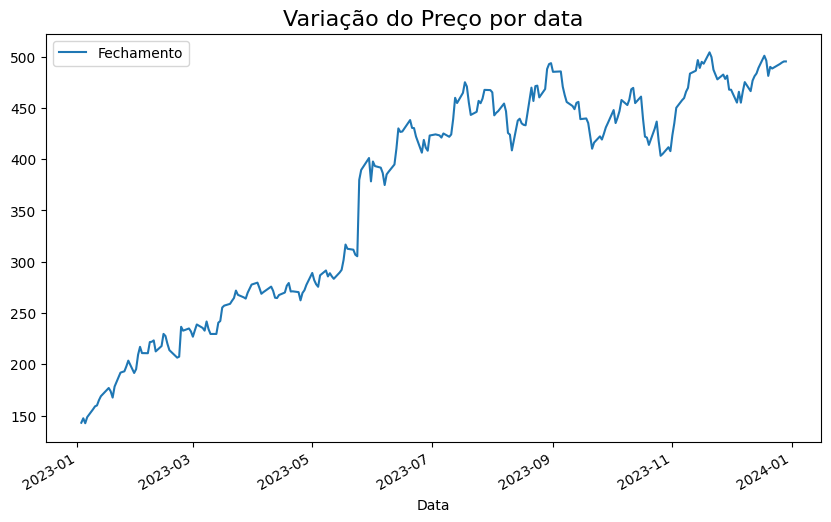

In [5]:
dados['Fechamento'].plot(figsize=(10,6))
plt.title('Variação do Preço por data',fontsize=16)
plt.legend(['Fechamento'])

In [6]:
#df = dados.head(60).copy()
df = dados
df['Data'] = df.index
df['Data'] = df['Data'].apply(mdates.date2num)
df

,Abertura,Maxima,Minima,Fechamento,Fech_Ajust,Volume,Data
Data,,,,,,,
2023-01-03,148.509995,149.960007,140.960007,143.149994,143.079788,40127700,19360.0
2023-01-04,145.669998,148.529999,142.410004,147.490005,147.417694,43132400,19361.0
2023-01-05,144.910004,145.639999,141.479996,142.649994,142.580048,38916800,19362.0
2023-01-06,144.740005,150.100006,140.339996,148.589996,148.517120,40504400,19363.0
2023-01-09,152.839996,160.559998,151.410004,156.279999,156.203354,50423100,19366.0
...,...,...,...,...,...,...,...
2023-12-22,491.950012,493.829987,484.670013,488.299988,488.277069,25213900,19713.0
2023-12-26,489.679993,496.000000,489.600006,492.790009,492.766907,24420000,19717.0
2023-12-27,495.109985,496.799988,490.850006,494.170013,494.146820,23364800,19718.0


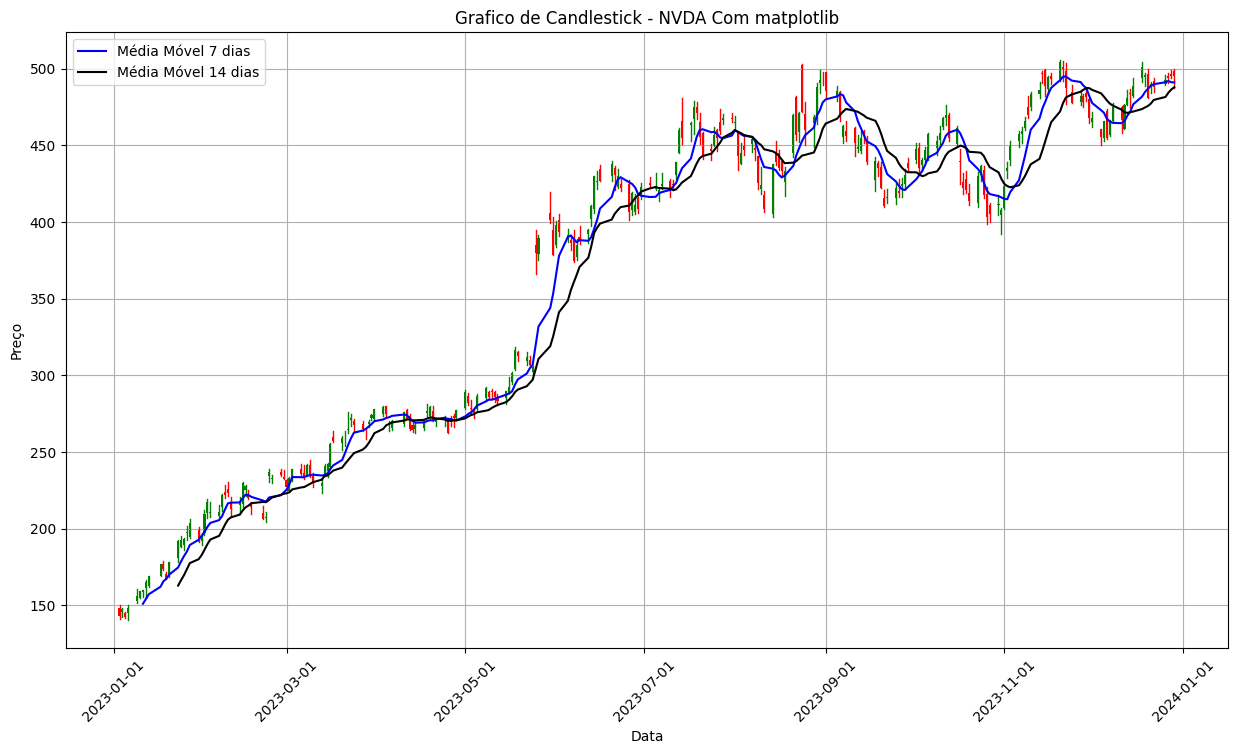

In [7]:
fig, ax = plt.subplots(figsize=(15,8))
width = 0.7
for i in range(len(df)):
    if df['Fechamento'].iloc[i] > df['Abertura'].iloc[i]:
        color = 'green'
    else:
        color = 'red'

    ax.plot([df['Data'].iloc[i], df['Data'].iloc[i]],
            [df['Minima'].iloc[i], df['Maxima'].iloc[i]],
            color=color,
            linewidth=1)
    
    ax.add_patch(plt.Rectangle((df['Data'].iloc[i] - width/2, min(df['Abertura'].iloc[i], df['Fechamento'].iloc[i])),
                               width,
                               abs(df['Fechamento'].iloc[i] - df['Abertura'].iloc[i]),
                               facecolor=color))
    
df['MA7'] = df['Fechamento'].rolling(window=7).mean()
df['MA14'] = df['Fechamento'].rolling(window=14).mean()
    
ax.plot(df['Data'], df['MA7'], color='blue', label='Média Móvel 7 dias')
ax.plot(df['Data'], df['MA14'], color='black', label='Média Móvel 14 dias')
ax.legend()

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.title(f'Grafico de Candlestick - {empresa} Com matplotlib')
plt.xlabel('Data')
plt.ylabel('Preço')

plt.grid(True)

plt.show()

In [8]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Abertura'],
                             high=df['Maxima'],
                             low=df['Minima'],
                             close=df['Fechamento'],
                             name='Candlestick'),
                             row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
                         row=1, col=1)

fig.add_trace(go.Bar(x=df.index,
                     y=df['Volume'],
                     name='Volume'),
                     row=2, col=1)

fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,
                  width=1100, height=600)

fig.show()

In [9]:
dados = yf.download(empresa, start=data_inicial, end=data_final)

[*********************100%%**********************]  1 of 1 completed


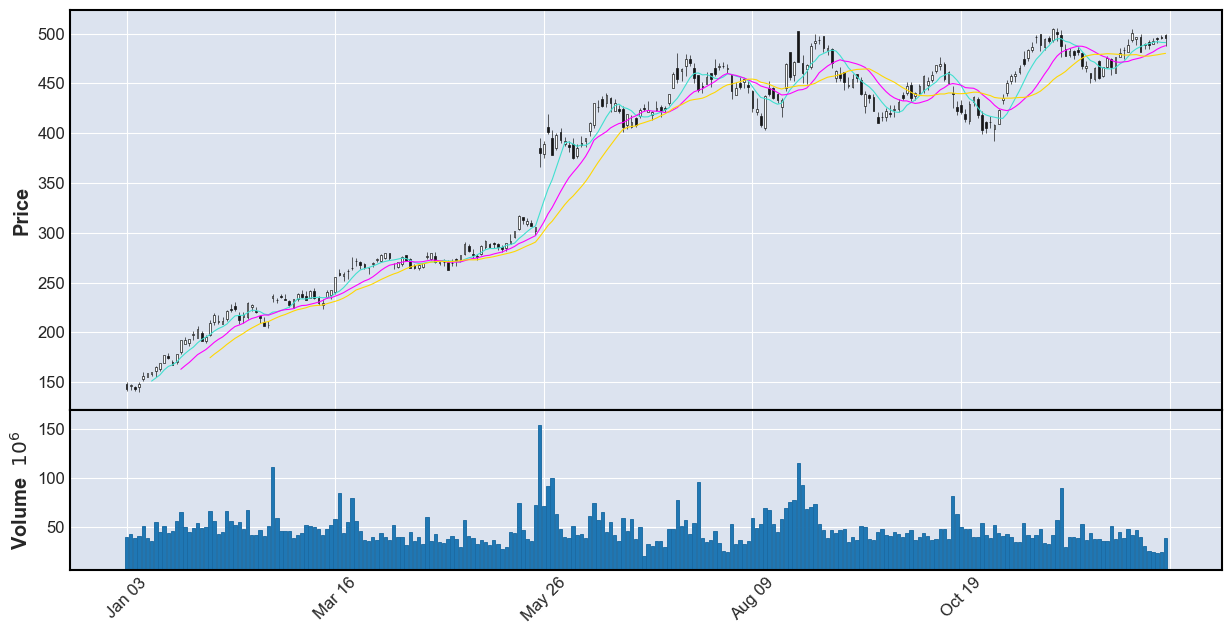

In [10]:
mpf.plot(dados, type='candle', figsize = (16,8), volume=True, mav=(7,14,21))